In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [17]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Mini Project/Dataset/iot23_combined.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1444674 non-null  int64  
 1   duration           1444674 non-null  float64
 2   orig_bytes         1444674 non-null  int64  
 3   resp_bytes         1444674 non-null  int64  
 4   missed_bytes       1444674 non-null  float64
 5   orig_pkts          1444674 non-null  float64
 6   orig_ip_bytes      1444674 non-null  float64
 7   resp_pkts          1444674 non-null  float64
 8   resp_ip_bytes      1444674 non-null  float64
 9   label              1444674 non-null  object 
 10  proto_icmp         1444674 non-null  bool   
 11  proto_tcp          1444674 non-null  bool   
 12  proto_udp          1444674 non-null  bool   
 13  conn_state_OTH     1444674 non-null  bool   
 14  conn_state_REJ     1444674 non-null  bool   
 15  conn_state_RSTO    1444674 non-n

In [19]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: count, dtype: int64

In [20]:
class_proportions = {
    'PartOfAHorizontalPortScan': 825939,
    'Okiru': 262690,
    'Benign': 197809,
    'DDoS': 138777,
    'C&C': 15100,
    'Attack': 3915,
    'C&C-HeartBeat': 349,
    'C&C-FileDownload': 43,
    'C&C-Torii': 30,
    'FileDownload': 13,
    'C&C-HeartBeat-FileDownload': 8,
    'C&C-Mirai': 1
}

total_rows = sum(class_proportions.values())
desired_rows = 100000
sample_sizes = {cls: int(desired_rows * (count / total_rows)) for cls, count in class_proportions.items()}
main_data = pd.DataFrame(columns=df.columns)
for cls, size in sample_sizes.items():
    if size > 0:
        class_data = df[df['label'] == cls]
        sampled_rows = class_data.sample(n=size, replace=True)
        main_data = pd.concat([main_data, sampled_rows])
if len(main_data) > desired_rows:
    main_data = main_data.sample(n=desired_rows, replace=False)
elif len(main_data) < desired_rows:
    largest_class = max(sample_sizes, key=sample_sizes.get)
    remaining_samples = df[df['label'] == largest_class].sample(n=desired_rows - len(main_data), replace=True)
    main_data = pd.concat([main_data, remaining_samples])
main_data.reset_index(drop=True, inplace=True)
main_data['label'].value_counts()

label
PartOfAHorizontalPortScan    57176
Okiru                        18183
Benign                       13692
DDoS                          9606
C&C                           1045
Attack                         270
C&C-HeartBeat                   24
C&C-FileDownload                 2
C&C-Torii                        2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

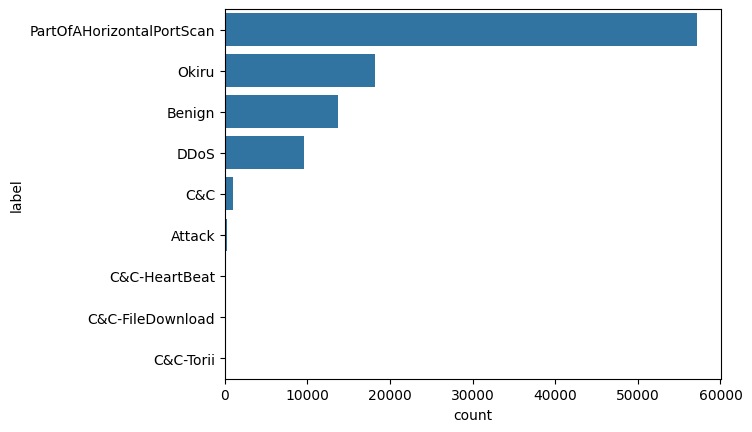

In [21]:
import seaborn as sns
sns.countplot(main_data['label'])

In [22]:
bool_columns = ['proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ',
                'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
                'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
                'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']

for col in bool_columns:
    main_data[col] = main_data[col].astype(int)

label_mapping = {
    'Benign': 1,
    'PartOfAHorizontalPortScan': 2,
    'Okiru': 3,
    'DDoS': 4,
    'C&C': 5,
    'Attack': 6,
    'C&C-HeartBeat': 7,
    'C&C-FileDownload': 8,
    'C&C-Torii': 9,
}

# Map labels using the manual mapping
main_data['label'] = main_data['label'].map(label_mapping)

# Handle missing values
main_data.fillna(main_data.mean(), inplace=True)

# Separate features and target
X = main_data.drop(columns=['label'])  # Drop the ID and label columns
y = main_data['label']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
print(X_scaled[:5])
print(y[:5])

[[-1.33223249 -0.01102604 -0.00353729 -0.01143894 -0.00455024 -0.00375057
  -0.00380365 -0.0560633  -0.01521156 -0.05085935  0.20335214 -0.19637159
  -0.29638379 -0.04431534 -0.01095511 -0.00632468 -0.02168458  0.
   0.32589404 -0.00447218 -0.00316229 -0.04126615 -0.10507408 -0.00447218
   0.        ]
 [ 0.4829995  -0.15606265 -0.00354983 -0.01240981 -0.00455024 -0.00293016
  -0.00345196 -0.0560633  -0.01521156 -0.05085935  0.20335214 -0.19637159
  -0.29638379 -0.04431534 -0.01095511 -0.00632468 -0.02168458  0.
   0.32589404 -0.00447218 -0.00316229 -0.04126615 -0.10507408 -0.00447218
   0.        ]
 [ 0.97341551 -0.01102604 -0.00353729 -0.01143894 -0.00455024 -0.00375057
  -0.00380365 -0.0560633  -0.01521156 -0.05085935  0.20335214 -0.19637159
  -0.29638379 -0.04431534 -0.01095511 -0.00632468 -0.02168458  0.
   0.32589404 -0.00447218 -0.00316229 -0.04126615 -0.10507408 -0.00447218
   0.        ]
 [ 1.1555086  -0.01102604 -0.00353729 -0.01143894 -0.00455024 -0.00375057
  -0.00380365 -0.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
# Identify anomalies
anomalies = np.where(clusters == -1)[0]
# Extract normal data points
normal_points = np.where(clusters != -1)[0]
# Extract anomalous data points and their corresponding labels
anomalous_data_points = X_scaled[anomalies]
anomalous_original_data_points = main_data.iloc[anomalies]

# Create a new DataFrame containing the anomalous data points and their labels
anomalies_df = anomalous_original_data_points.copy()
anomalies_df['cluster_label'] = -1

# Display the anomalies DataFrame
anomalies_df

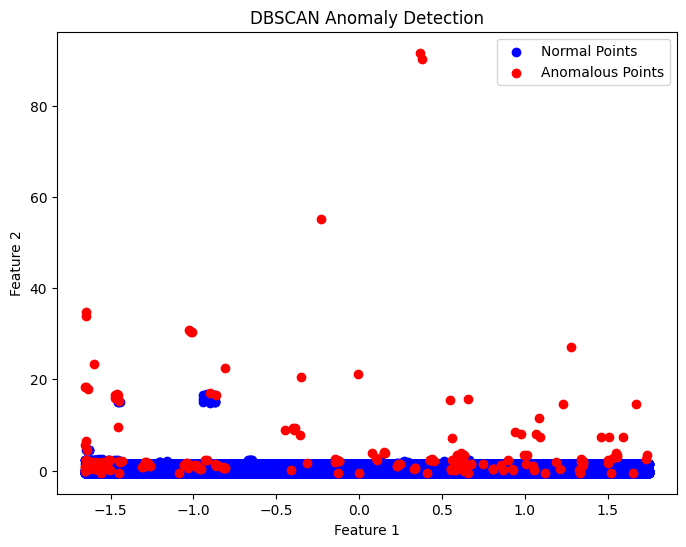

In [ ]:
import matplotlib.pyplot as plt
# Plotting the data points
plt.figure(figsize=(8, 6))
# Plot normal points
plt.scatter(X_scaled[normal_points, 0], X_scaled[normal_points, 1], color='blue', label='Normal Points')
# Plot anomalous points
plt.scatter(anomalous_data_points[:, 0], anomalous_data_points[:, 1], color='red', label='Anomalous Points')
plt.title('DBSCAN Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
anomalies_df['label'].value_counts()

label
6    87
1    52
2    39
5    10
4     3
7     2
3     1
8     1
Name: count, dtype: int64

In [ ]:
anomalies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 336 to 49994
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         195 non-null    int64  
 1   duration           195 non-null    float64
 2   orig_bytes         195 non-null    int64  
 3   resp_bytes         195 non-null    int64  
 4   missed_bytes       195 non-null    float64
 5   orig_pkts          195 non-null    float64
 6   orig_ip_bytes      195 non-null    float64
 7   resp_pkts          195 non-null    float64
 8   resp_ip_bytes      195 non-null    float64
 9   label              195 non-null    int64  
 10  proto_icmp         195 non-null    int64  
 11  proto_tcp          195 non-null    int64  
 12  proto_udp          195 non-null    int64  
 13  conn_state_OTH     195 non-null    int64  
 14  conn_state_REJ     195 non-null    int64  
 15  conn_state_RSTO    195 non-null    int64  
 16  conn_state_RSTOS0  195 non-

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
anomalies_df.drop(columns=['Unnamed: 0'], inplace=True)

# Define features and target
X = anomalies_df.drop(columns=['label'])
y = anomalies_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred = rf_classifier.predict(X_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7435897435897436
Confusion Matrix:
 [[ 4  2  1  0  2  0]
 [ 0  7  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  0 18  0]
 [ 1  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.44      0.50         9
           2       0.64      1.00      0.78         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.90      0.95      0.92        19
           7       0.00      0.00      0.00         1

    accuracy                           0.74        39
   macro avg       0.35      0.40      0.37        39
weighted avg       0.68      0.74      0.70        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to train the model
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Predict and evaluate again
y_pred_best = best_rf_classifier.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
